In [1]:
!pip install tensorflow keras scikit-learn matplotlib numpy pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.3/236.3 MB 3.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 11.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 11.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.1/405.1 kB 6.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 11.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.1/305.1 kB 8.7 MB/s eta 0:00:00


In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import os

In [21]:
# 检查文件夹路径
image_folder = r"/Users/bobwei/Downloads/Flower/flower_images/flower_images"
if not os.path.exists(image_folder):
    print("文件夹不存在，请检查路径。")
else:
    image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.png')]
    print(image_files[:10])  # 查看前10个文件


['/Users/bobwei/Downloads/Flower/flower_images/flower_images/0065.png', '/Users/bobwei/Downloads/Flower/flower_images/flower_images/0071.png', '/Users/bobwei/Downloads/Flower/flower_images/flower_images/0059.png', '/Users/bobwei/Downloads/Flower/flower_images/flower_images/0111.png', '/Users/bobwei/Downloads/Flower/flower_images/flower_images/0105.png', '/Users/bobwei/Downloads/Flower/flower_images/flower_images/0139.png', '/Users/bobwei/Downloads/Flower/flower_images/flower_images/0138.png', '/Users/bobwei/Downloads/Flower/flower_images/flower_images/0104.png', '/Users/bobwei/Downloads/Flower/flower_images/flower_images/0110.png', '/Users/bobwei/Downloads/Flower/flower_images/flower_images/0058.png']


In [23]:
def preprocess_image(image_path):
    # 加载图像并调整尺寸
    img = load_img(image_path, target_size=(224, 224))
    # 转换为NumPy数组
    img_array = img_to_array(img)
    # 扩展维度以符合模型输入要求 (1, 224, 224, 3)
    img_array = np.expand_dims(img_array, axis=0)
    # 图像预处理
    img_array = preprocess_input(img_array)
    return img_array

In [25]:
# 加载VGG16模型并移除输出层
vgg_model = VGG16(weights='imagenet', include_top=False, pooling='avg')

def extract_features(image_path):
    img_array = preprocess_image(image_path)
    features = vgg_model.predict(img_array)
    return features.flatten()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [27]:
features = []
for image_file in image_files:
    features.append(extract_features(image_file))

# 将特征向量转换为NumPy数组
features = np.array(features)
print("特征向量形状：", features.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/s

In [29]:
pca = PCA(n_components=100)
reduced_features = pca.fit_transform(features)
print("降维后特征向量形状：", reduced_features.shape)

降维后特征向量形状： (210, 100)


In [31]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(reduced_features)

# 获取每张图像的聚类标签
labels = kmeans.labels_

In [33]:
# 将图像按聚类标签分组
clusters = {}
for label, image_file in zip(labels, image_files):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(image_file)

# 查看第一个聚类中的图像
print("聚类0中的图像：", clusters[0])

聚类0中的图像： ['/Users/bobwei/Downloads/Flower/flower_images/flower_images/0088.png', '/Users/bobwei/Downloads/Flower/flower_images/flower_images/0148.png', '/Users/bobwei/Downloads/Flower/flower_images/flower_images/0152.png', '/Users/bobwei/Downloads/Flower/flower_images/flower_images/0178.png', '/Users/bobwei/Downloads/Flower/flower_images/flower_images/0022.png', '/Users/bobwei/Downloads/Flower/flower_images/flower_images/0046.png', '/Users/bobwei/Downloads/Flower/flower_images/flower_images/0052.png', '/Users/bobwei/Downloads/Flower/flower_images/flower_images/0123.png', '/Users/bobwei/Downloads/Flower/flower_images/flower_images/0134.png']


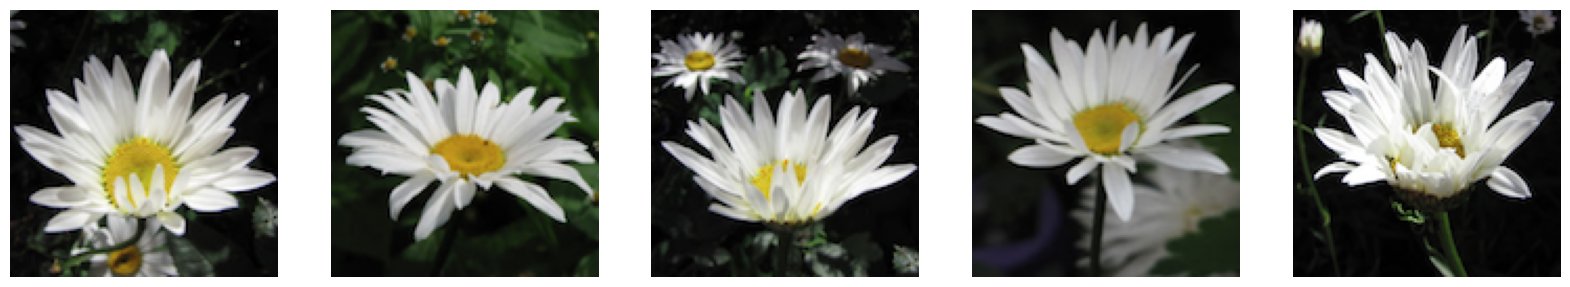

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_images(cluster_id, n=5):
    plt.figure(figsize=(20, 20))
    images = clusters[cluster_id][:n]
    for i, image_file in enumerate(images):
        img = mpimg.imread(image_file)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# 可视化聚类0中的5张图像
plot_images(0)

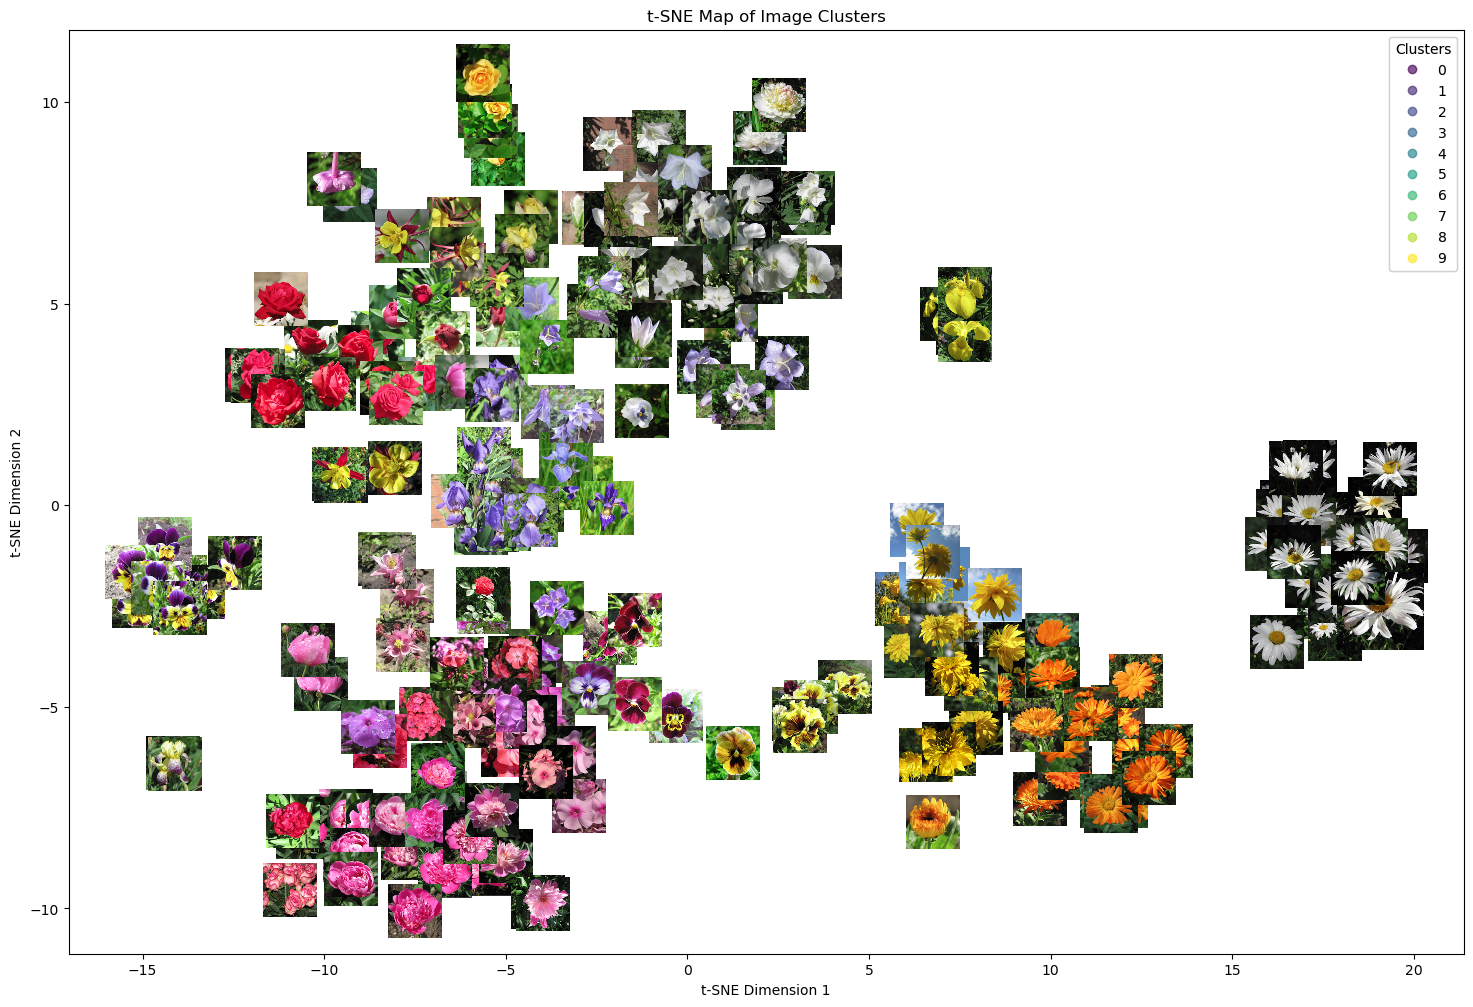

In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# 使用 t-SNE 降维，将特征向量降到2D
tsne = TSNE(n_components=2, random_state=42)
features_2d = tsne.fit_transform(reduced_features)  # reduced_features 是之前降维后的特征

# 定义一个函数来绘制带有缩略图的 t-SNE 图
def plot_images_on_map(images, features_2d, cluster_labels, save=False):
    fig, ax = plt.subplots(figsize=(18, 12))
    
    # 绘制散点图，并按聚类标签分配颜色
    scatter = ax.scatter(features_2d[:, 0], features_2d[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6, s=10)
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
    
    # 在图中添加每张图像的缩略图
    for i, (x, y) in enumerate(features_2d):
        image = plt.imread(images[i])  # 读取图像文件
        im = OffsetImage(image, zoom=0.3)  # 缩略图大小
        ab = AnnotationBbox(im, (x, y), xycoords='data', frameon=False)
        ax.add_artist(ab)
    
    plt.title("t-SNE Map of Image Clusters")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    
    # 如果需要保存图片，则指定路径和文件名
    if save:
        output_folder = '/Users/bobwei/Downloads'  # 请将路径改为你下载文件夹的实际路径
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)
        plt.savefig(f'{output_folder}/tsne_image_clusters.png', bbox_inches='tight', dpi=300)
    
    plt.show()

# 调用函数来绘制并保存 t-SNE 图
plot_images_on_map(image_files, features_2d, labels, save=True)  # 设置 save=True 以保存图像
